### Cohort 분석

* 특정 기간 동안 공통된 특성이나 경험을 갖는 사용자 집단
- 월별 구매에 대한 코호트 분석 실행

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
sales=pd.read_csv("../../data/sales/4. sample data.csv",encoding='ms949')

In [7]:
sales.head()

,주문번호,아이디,결제일
0,1,nhac6b,2019-01-31 23:59
1,2,gha890,2019-01-31 23:57
2,3,c2adaj,2019-01-31 23:52
3,4,kaa369,2019-01-31 23:51
4,5,loajve,2019-01-31 23:50


In [10]:
# 결제일 기간 2019년 1월~ 2019년 12월 
sales.sort_values('결제일')

,주문번호,아이디,결제일
4771,4772,jaa523,2019-01-01 0:19
4770,4771,nha5ce,2019-01-01 0:32
4769,4770,kyanju,2019-01-01 0:36
4768,4769,eyaa80,2019-01-01 0:38
4767,4768,nha62e,2019-01-01 0:51
...,...,...,...
142714,142715,ysa748,2019-12-31 8:14
142711,142712,msaimw,2019-12-31 8:46
142710,142711,jba223,2019-12-31 8:47
142709,142710,rkadgh,2019-12-31 9:06


### 1) 결제월 데이터 추출 및 월 기준으로 주문 이력 정리

- 결제일에서 결제월 데이터 추출
- 해당 월에 주문이력 있는지 여부 > 중복 제거

In [14]:
# data type datetime 으로 변경
sales['결제일']=pd.to_datetime(sales['결제일'],infer_datetime_format=True)

In [15]:
sales['결제월']=sales['결제일'].dt.month

In [17]:
user_month_order=sales[['아이디','결제월']]

In [19]:
# 사용자의 월별 구매 이력 
user_month_order.drop_duplicates(inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
user_month_order.head()

,아이디,결제월
0,nhac6b,1
1,gha890,1
2,c2adaj,1
3,kaa369,1
4,loajve,1


### 2) 결제월과 시작월의 차이 구하기

- 첫 구매로부터 +n 월에 구매 이력있는지 알 수 있음 

In [21]:
month_group=user_month_order.groupby('아이디')['결제월']
user_month_order['시작월']= month_group.transform(np.min)
user_month_order

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,아이디,결제월,시작월
0,nhac6b,1,1
1,gha890,1,1
2,c2adaj,1,1
3,kaa369,1,1
4,loajve,1,1
...,...,...,...
151891,nya553,12,7
151892,ifa240,12,12
151893,tna330,12,12
151894,faac38,12,12


In [23]:
user_month_order['PassedMonth']=user_month_order['결제월']-user_month_order['시작월']

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
user_month_order.head()

,아이디,결제월,시작월,PassedMonth
0,nhac6b,1,1,0
1,gha890,1,1,0
2,c2adaj,1,1,0
3,kaa369,1,1,0
4,loajve,1,1,0


### 3) Cohort 테이블 작성

In [27]:
cohort=user_month_order.groupby(['시작월','PassedMonth'])

In [29]:
# 시작월, PassedMonth 조합의 유니크한 고객 수 
def get_uni(c):
    return len(np.unique(c))
cohort_df=cohort['아이디'].apply(get_uni).reset_index()
cohort_df

,시작월,PassedMonth,아이디
0,1,0,4034
1,1,1,625
2,1,2,735
3,1,3,834
4,1,4,1204
...,...,...,...
73,10,1,189
74,10,2,121
75,11,0,3259
76,11,1,172


### 고객 수 코호트 테이블

In [30]:
cohort_df=cohort_df.pivot(index='시작월',columns='PassedMonth')
cohort_df

아이디                                                         \
PassedMonth       0       1       2       3       4       5       6      7    
시작월                                                                           
1             4034.0   625.0   735.0   834.0  1204.0  1350.0  1293.0  854.0   
2             3174.0   483.0   556.0   761.0   949.0   863.0   566.0  468.0   
3             4495.0   768.0   902.0  1065.0  1075.0   654.0   581.0  463.0   
4             6399.0  1043.0  1255.0  1144.0   713.0   623.0   500.0  528.0   
5            10924.0  2004.0  1766.0   984.0   803.0   623.0   666.0  653.0   
6            17425.0  2322.0  1148.0   703.0   613.0   674.0   700.0    NaN   
7            13405.0  1041.0   566.0   422.0   486.0   517.0     NaN    NaN   
8             4826.0   292.0   175.0   167.0   191.0     NaN     NaN    NaN   
9             4176.0   234.0   179.0   189.0     NaN     NaN     NaN    NaN   
10            3378.0   189.0   121.0     NaN     NaN     NaN     NaN    NaN   
11            3259.0   172.0     NaN     NaN     NaN     NaN     NaN    NaN   
12            3620.0     NaN     NaN     NaN     NaN     NaN     NaN    NaN   

                                         
PassedMonth     8      9      10     11  
시작월                                      
1            732.0  606.0  659.0  657.0  
2            420.0  479.0  450.0    NaN  
3            521.0  472.0    NaN    NaN  
4            491.0    NaN    NaN    NaN  
5              NaN    NaN    NaN    NaN  
6              NaN    NaN    NaN    NaN  
7              NaN    NaN    NaN    NaN  
8              NaN    NaN    NaN    NaN  
9              NaN    NaN    NaN    NaN  
10             NaN    NaN    NaN    NaN  
11             NaN    NaN    NaN    NaN  
12             NaN    NaN    NaN    NaN

### 잔존율 코호트 테이블

In [32]:
cohort_df.iloc[:,0]

시작월
1      4034.0
2      3174.0
3      4495.0
4      6399.0
5     10924.0
6     17425.0
7     13405.0
8      4826.0
9      4176.0
10     3378.0
11     3259.0
12     3620.0
Name: (아이디, 0), dtype: float64

In [34]:
customer_cohort=cohort_df.div(cohort_df.iloc[:,0],axis=0)*100
customer_cohort=customer_cohort.round(decimals=2)
customer_cohort

아이디                                                          \
PassedMonth     0      1      2      3      4      5      6      7      8    
시작월                                                                          
1            100.0  15.49  18.22  20.67  29.85  33.47  32.05  21.17  18.15   
2            100.0  15.22  17.52  23.98  29.90  27.19  17.83  14.74  13.23   
3            100.0  17.09  20.07  23.69  23.92  14.55  12.93  10.30  11.59   
4            100.0  16.30  19.61  17.88  11.14   9.74   7.81   8.25   7.67   
5            100.0  18.34  16.17   9.01   7.35   5.70   6.10   5.98    NaN   
6            100.0  13.33   6.59   4.03   3.52   3.87   4.02    NaN    NaN   
7            100.0   7.77   4.22   3.15   3.63   3.86    NaN    NaN    NaN   
8            100.0   6.05   3.63   3.46   3.96    NaN    NaN    NaN    NaN   
9            100.0   5.60   4.29   4.53    NaN    NaN    NaN    NaN    NaN   
10           100.0   5.60   3.58    NaN    NaN    NaN    NaN    NaN    NaN   
11           100.0   5.28    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
12           100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                  
PassedMonth     9      10     11  
시작월                               
1            15.02  16.34  16.29  
2            15.09  14.18    NaN  
3            10.50    NaN    NaN  
4              NaN    NaN    NaN  
5              NaN    NaN    NaN  
6              NaN    NaN    NaN  
7              NaN    NaN    NaN  
8              NaN    NaN    NaN  
9              NaN    NaN    NaN  
10             NaN    NaN    NaN  
11             NaN    NaN    NaN  
12             NaN    NaN    NaN

### 4. 히트맵 작성

In [35]:
xtick = np.arange(0,13)
ytick = ['1','2','3','4','5','6','7','8','9','10','11','12']

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50900 missing from current fon

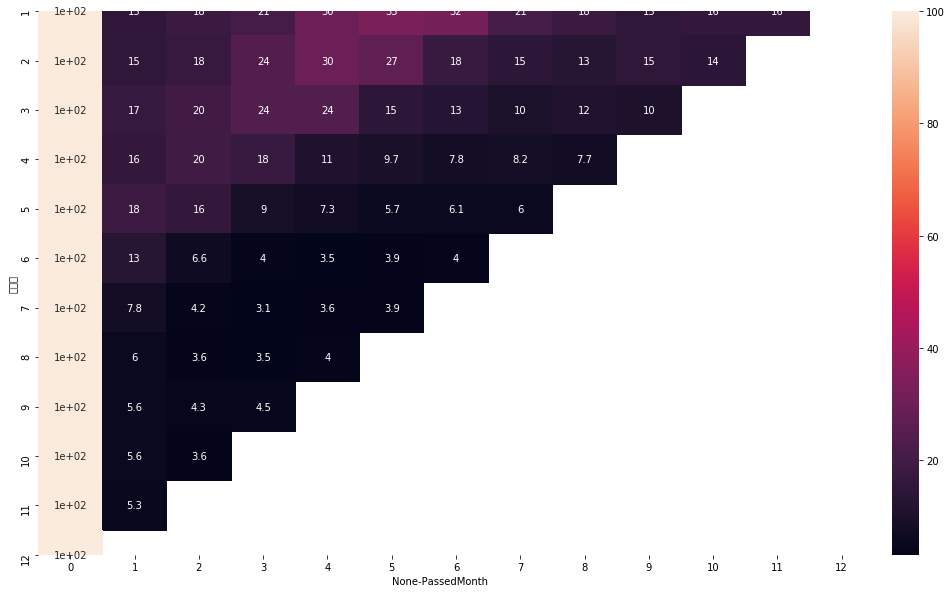

In [36]:
plt.figure(figsize=(18,10))
sns.heatmap(customer_cohort,annot=True, xticklabels=xtick, yticklabels=ytick)